### Error Bars and Confidence Intervals

Error Bars

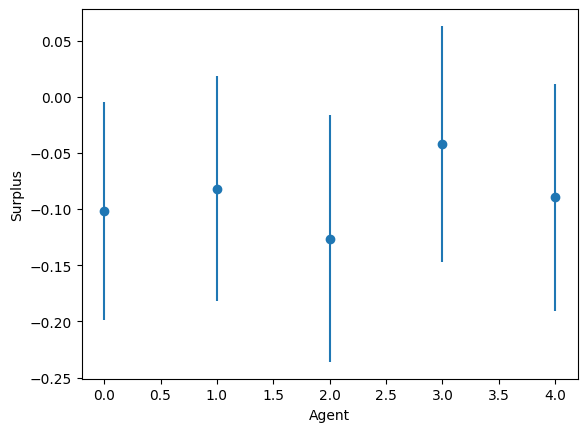

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# example data
num_agents = 5
num_trials = 100
surplus_list = [np.random.normal(size=num_trials) for _ in range(num_agents)]

# compute means and standard errors
means = [np.mean(surplus) for surplus in surplus_list]
std_errs = [np.std(surplus) / np.sqrt(num_trials) for surplus in surplus_list]

# plot means with error bars
plt.errorbar(range(num_agents), means, yerr=std_errs, fmt='o')
plt.xlabel('Agent')
plt.ylabel('Surplus')
plt.show()


Confidence Intervals

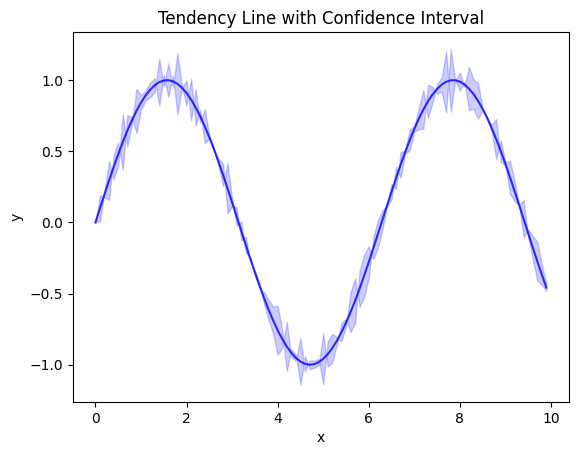

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0, 10, 0.1)
y = np.sin(x)
y_err = 0.1 * np.random.randn(len(x))

# plot tendency line
plt.plot(x, y, color='blue', alpha=0.8)

# plot confidence interval
plt.fill_between(x, y - y_err, y + y_err, color='blue', alpha=0.2)

# set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tendency Line with Confidence Interval')

# show plot
plt.show()


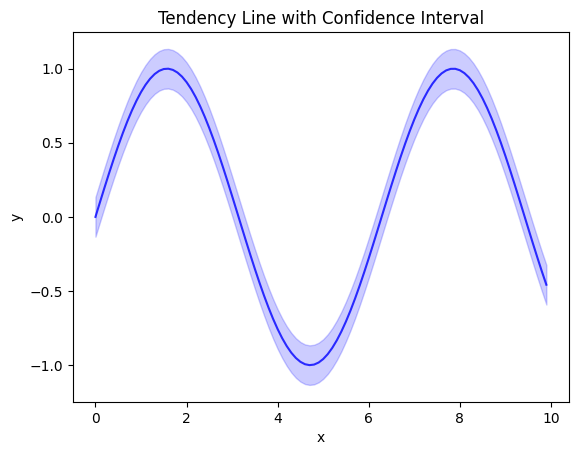

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# example data
x = np.arange(0, 10, 0.1)
y = np.sin(x)
y_err = stats.sem(y)  # calculate standard error

# plot tendency line
plt.plot(x, y, color='blue', alpha=0.8)

# plot confidence interval
plt.fill_between(x, y - 2*y_err, y + 2*y_err, color='blue', alpha=0.2)

# set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tendency Line with Confidence Interval')

# show plot
plt.show()


### SB3 SAC algo

In [ ]:
import gymnasium as gym
import numpy as np

from stable_baselines3 import SAC

env = gym.make("Pendulum-v1")
print(env.observation_space)

model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=100)
model.predict
# model.save("sac_pendulum")

# del model # remove to demonstrate saving and loading

# model = SAC.load("sac_pendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    print(action)
    print(_states)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

### Investigating how numpy masks work

In [74]:
import numpy as np
from numpy import random

x = np.array([100,200,300])
y = np.array([random.choice(x) for _ in range(10)])
win_mask = np.array([bool(random.binomial(1, 0.5)) for _ in range(10)])

print(x,'\n', y,'\n',win_mask)

[100 200 300] 
 [300 100 300 300 300 100 300 200 300 300] 
 [ True False  True  True  True  True False False  True  True]


In [75]:
mask_1 = np.array(y == x[0])

y[win_mask] += 17
print(y[win_mask])

print(y)

print(mask_1)

print(y[mask_1])

print(y[~mask_1])

[317 317 317 317 117 317 317]
[317 100 317 317 317 117 300 200 317 317]
[False  True False False False  True False False False False]
[100 117]
[317 317 317 317 300 200 317 317]


In [82]:
print(y)
print(y[win_mask])
print(y[mask_1])
mask_mask = win_mask & mask_1
print('----------')
print('w',win_mask)
print('1',mask_1)
print('M',mask_mask)
print(y[mask_mask])

[317 100 317 317 317 117 300 200 317 317]
[317 317 317 317 117 317 317]
[100 117]
----------
w [ True False  True  True  True  True False False  True  True]
1 [False  True False False False  True False False False False]
M [False False False False False  True False False False False]
[117]


### Stacked Bar Plot

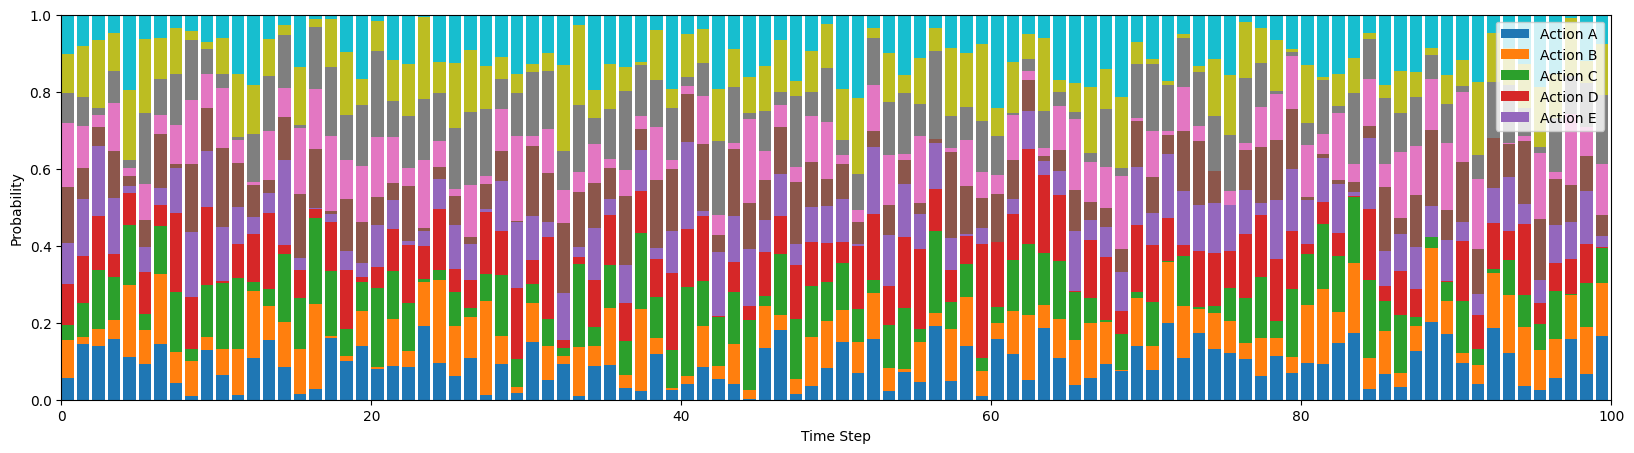

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming action_probabilities is a 2D numpy array where each row represents
# the probabilities of the 5 actions at a certain time step
# and each column represents a different action
action_probabilities = np.random.rand(100, 10)

# Normalize the probabilities so that they sum to 1 at each time step
normalized_probabilities = action_probabilities / np.sum(action_probabilities, axis=1)[:, None]

# Create the stacked bar plot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_xlim([0, len(normalized_probabilities)])
ax.set_ylim([0, 1])
ax.set_ylabel('Probabilities')
ax.set_xlabel('Time Step')

# Create the stacked bars
bars = []
for i in range(len(normalized_probabilities[0])):
    if i == 0:
        bars.append(ax.bar(np.arange(len(normalized_probabilities)), normalized_probabilities[:, i], align='edge'))
    else:
        bars.append(ax.bar(np.arange(len(normalized_probabilities)), normalized_probabilities[:, i], bottom=np.sum(normalized_probabilities[:, :i], axis=1), align='edge'))

# Add a legend
ax.legend([bar[0] for bar in bars], ['Action A', 'Action B', 'Action C', 'Action D', 'Action E'])

# Show the plot
plt.show()


### np.random.choice(array)
How To get random values np.random.choice() from deque and arrays

In [16]:
import numpy as np
from collections import deque

a = np.array([1,2,3,4,5])
b = np.array(['a','b','c','d','e'])
c = np.array([True,False,True,False,True])
d = np.array(np.random.rand(5))

ab = np.stack((a,b), axis=1)
ab = [tuple(x) for x in ab]

buffer = deque(maxlen=1000)

def add_to_buffer(state, action, done):
    buffer.append((state, action, done))

for i in range(a.size):
    # print(tuple(ab[i]), c[i], d[i])
    add_to_buffer(ab[i], c[i], d[i])

# print(len(buffer))

indexes = np.random.choice(range(len(buffer)), 3, replace=False)
samples = [buffer[i] for i in indexes]
indexes, samples

('1', 'a') True 0.7438860926391048
('2', 'b') False 0.6521709325734536
('3', 'c') True 0.22841953183355923
('4', 'd') False 0.07632829639617733
('5', 'e') True 0.01945412700187399
5


(array([3, 1, 0]),
 [(('4', 'd'), False, 0.07632829639617733),
  (('2', 'b'), False, 0.6521709325734536),
  (('1', 'a'), True, 0.7438860926391048)])

### overflow double_scalars

In [7]:
import numpy as np

ones = np.ones(10)
ones_2 = np.zeros_like(ones)

for i in range(10):
    ones_2[i] = ones[:i+1].sum()

ones_3 = [ones[:i+1].sum() for i in range(len(ones))]

ones_3

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [4]:
import numpy as np

#more
# [np.array(x)[:i+1].mean() for i,x in enumerate([np.array(self.regret)[:i+1].sum() for i in range(len(self.regret))]) ]

a = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
b = np.array([a[:i+1].mean() for i in range(len(a))])
a, b

(array([1., 0., 0., 0., 0.]),
 array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ]))

### check instance / subclass of object

In [1]:
class A:
    def __init__(self):
        pass

class A2(A):
    def __init__(self):
        super().__init__()

a1 = A()
a2 = A2()

print('a1, A -> ',isinstance(a1, A), '\t\ta1, A2 -> ', isinstance(a1, A2))
print('a2, A -> ',isinstance(a2, A), '\t\ta2, A2 -> ', isinstance(a2, A2))

# print('a1, A -> ',issubclass(A, A), '\t\ta1, A2 -> ', issubclass(A, A2))

a1, A ->  True 		a1, A2 ->  False
a2, A ->  True 		a2, A2 ->  True


### any value <0

In [40]:
import numpy as np

a = np.array([np.random.rand(5)*1.2-0.2])
# a, a[a<0].any()
a, (a<0).any()

(array([[ 0.81503721, -0.13060222,  0.30522736,  0.41021736,  0.47438325]]),
 True)